# Code for varying final time and amount of data points for neural ODE

In this code, we experiment with changing the simulation end points, as well as the amount of data points in the data set, to see where limits are of the neural ODE approach to inferring the GRN from data

In [16]:
import torch
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
seed = np.random.randint(1,200)
seed = 56
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
print(seed)
g = torch.Generator()
g.manual_seed(seed)

56


check


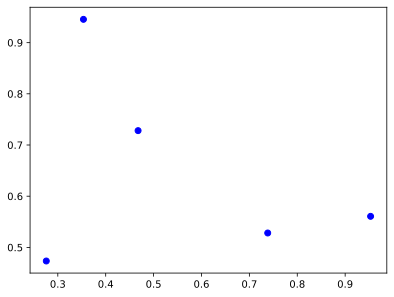

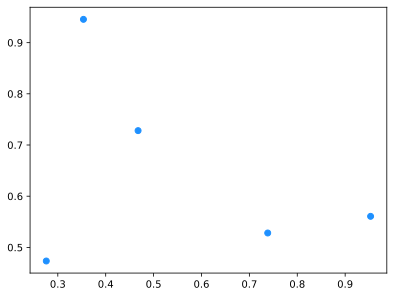

No change applied to TS or repr data


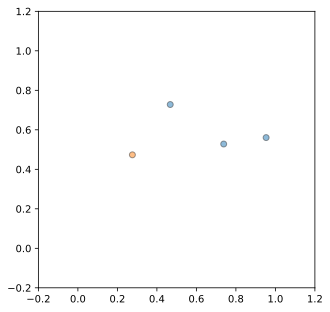

In [17]:
data_noise = 0.0
plotlim = [-0.2, 1.2]
subfolder = 'traj_TS'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('TS', noise = data_noise, plotlim = plotlim, random_state = seed, label = 'vector', deltat=1, batch_size=5)

In [18]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 20, 20
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = False
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'inside' #outside

In [26]:
num_epochs = 160 #number of optimization runs in which the dataset is used for gradient decent
eps = 0.2

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3)

from models.training import doublebackTrainer

trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps_comp = 0.2) 
# verbose = True for more details
trainer_anode.train(dataloader, num_epochs)


Iteration 0/1
Loss: 0.992
Epoch 1: 0.992

Iteration 0/1
Loss: 0.968
Epoch 2: 0.968

Iteration 0/1
Loss: 0.942
Epoch 3: 0.942

Iteration 0/1
Loss: 0.913
Epoch 4: 0.913

Iteration 0/1
Loss: 0.883
Epoch 5: 0.883

Iteration 0/1
Loss: 0.850
Epoch 6: 0.850

Iteration 0/1
Loss: 0.815
Epoch 7: 0.815

Iteration 0/1
Loss: 0.778
Epoch 8: 0.778

Iteration 0/1
Loss: 0.740
Epoch 9: 0.740

Iteration 0/1
Loss: 0.701
Epoch 10: 0.701

Iteration 0/1
Loss: 0.660
Epoch 11: 0.660

Iteration 0/1
Loss: 0.620
Epoch 12: 0.620

Iteration 0/1
Loss: 0.580
Epoch 13: 0.580

Iteration 0/1
Loss: 0.540
Epoch 14: 0.540

Iteration 0/1
Loss: 0.502
Epoch 15: 0.502

Iteration 0/1
Loss: 0.464
Epoch 16: 0.464

Iteration 0/1
Loss: 0.427
Epoch 17: 0.427

Iteration 0/1
Loss: 0.391
Epoch 18: 0.391

Iteration 0/1
Loss: 0.357
Epoch 19: 0.357

Iteration 0/1
Loss: 0.323
Epoch 20: 0.323

Iteration 0/1
Loss: 0.291
Epoch 21: 0.291

Iteration 0/1
Loss: 0.260
Epoch 22: 0.260

Iteration 0/1
Loss: 0.231
Epoch 23: 0.231

Iteration 0/1
Loss:

In [27]:
for param in anode.named_parameters():
    print(param)

('flow.dynamics.fc2_time.0.weight', Parameter containing:
tensor([[ 0.6722,  0.1174],
        [-0.2502,  0.5872]], requires_grad=True))
('flow.dynamics.fc2_time.0.bias', Parameter containing:
tensor([-0.0147,  0.2806], requires_grad=True))
('flow.dynamics.fc2_time.1.weight', Parameter containing:
tensor([[-0.2842, -0.0053],
        [ 0.2939, -0.0026]], requires_grad=True))
('flow.dynamics.fc2_time.1.bias', Parameter containing:
tensor([-0.3614,  0.3460], requires_grad=True))
('flow.dynamics.fc2_time.2.weight', Parameter containing:
tensor([[-0.0399, -0.2906],
        [-0.1815,  0.1349]], requires_grad=True))
('flow.dynamics.fc2_time.2.bias', Parameter containing:
tensor([ 0.1571, -0.0224], requires_grad=True))
('flow.dynamics.fc2_time.3.weight', Parameter containing:
tensor([[-0.3031, -0.2163],
        [-0.0648, -0.3295]], requires_grad=True))
('flow.dynamics.fc2_time.3.bias', Parameter containing:
tensor([-0.5858, -0.4505], requires_grad=True))
('flow.dynamics.fc2_time.4.weight', Para